# Analysing criminal data from NY between 2013 and 2015

In [39]:
%pylab inline
import numpy
import pandas
import matplotlib.pyplot as plt
import dateutil.parser as parser

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Creating functions

In [112]:
def getYear(date):
    try:
        year = date.strftime('%Y-%m-%d')
        return parser.parse(year).year
    except:
        return np.nan
    
def getMonth(date):
    try:
        month = date.strftime('%Y-%m-%d')
        return parser.parse(month).month
    except:
        return np.nan
    
def getDay(date):
    try:
        day = date.strftime('%Y-%m-%d')
        return parser.parse(day).day
    except:
        return np.nan
    
def getHour(date):
    try:
        return date.strftime('%H:%m').split(':')[0]
    except:
        return np.nan
    
def getMinute(date):
    try:
        return date.strftime('%H:%m').split(':')[1]
    except:
        return np.nan

### Starting analysis from Crime dataset

In [2]:
desc = pandas.read_csv("Crime_Column_Description.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
desc

,Column,Description
0,CMPLNT_NUM,Randomly generated persistent ID for each comp...
1,CMPLNT_FR_DT,Exact date of occurrence for the reported even...
2,CMPLNT_FR_TM,Exact time of occurrence for the reported even...
3,CMPLNT_TO_DT,Ending date of occurrence for the reported eve...
4,CMPLNT_TO_TM,Ending time of occurrence for the reported eve...
5,RPT_DT,Date event was reported to police
6,KY_CD,Three digit offense classification code
7,OFNS_DESC,Description of offense corresponding with key ...
8,PD_CD,Three digit internal classification code (more...
9,PD_DESC,Description of internal classification corresp...


### Reading data historic

In [80]:
ds = pandas.read_csv("NYPD_Complaint_Data_Historic.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
ds.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314,241257,40.82884833,-73.91666114,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103,OUTSIDE,NaN,NaN,NaN,1043991,193406,40.69733814,-73.78455674,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503,"CONTROLLED SUBSTANCE,INTENT TO",...,28,NaN,OTHER,NaN,NaN,999463,231690,40.80260661,-73.94505191,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,105,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183,177862,40.65454944,-73.72633879,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,13,FRONT OF,OTHER,NaN,NaN,987606,208148,40.7380024,-73.98789129,"(40.7380024, -73.98789129)"


In [124]:
date = pandas.to_datetime(ds['CMPLNT_FR_DT'], errors = 'coerce')
time = pandas.to_datetime(ds['CMPLNT_FR_TM'], errors = 'coerce')

ds['year'] = date.apply(getYear)
ds['month'] = date.apply(getMonth)
ds['day'] = date.apply(getDay)
ds['hour'] = time.apply(getHour)
ds['minute'] = time.apply(getMinute)
del ds["CMPLNT_FR_DT"]
del ds["CMPLNT_FR_TM"]
ds.head()

,CMPLNT_NUM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,...,Y_COORD_CD,Latitude,Longitude,Lat_Lon,test,year,month,day,hour,minute
0,101109527,NaN,NaN,12/31/2015,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,...,241257,40.82884833,-73.91666114,"(40.828848333, -73.916661142)",2015-12-31,2015.0,12.0,31.0,23,05
1,153401121,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,...,193406,40.69733814,-73.78455674,"(40.697338138, -73.784556739)",2015-12-31,2015.0,12.0,31.0,23,05
2,569369778,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,...,231690,40.80260661,-73.94505191,"(40.802606608, -73.945051911)",2015-12-31,2015.0,12.0,31.0,23,05
3,968417082,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,COMPLETED,MISDEMEANOR,...,177862,40.65454944,-73.72633879,"(40.654549444, -73.726338791)",2015-12-31,2015.0,12.0,31.0,23,05
4,641637920,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,COMPLETED,MISDEMEANOR,...,208148,40.7380024,-73.98789129,"(40.7380024, -73.98789129)",2015-12-31,2015.0,12.0,31.0,23,05


### Reading population data in NY

In [32]:
population = pandas.read_csv("Population_by_Borough_NYC.csv")
population.head()

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,"7,891,957",100%,"7,781,984",100%,"7,894,862",100%,"7,071,639",100%,...,"8,008,278",100%,"8,242,624",100%,"8,550,971",100%,"8,821,027",100%,"9,025,145",100%
1,Total Population,Bronx,"1,451,277",18.39%,"1,424,815",18.31%,"1,471,701",18.64%,"1,168,972",16.53%,...,"1,332,650",16.64%,"1,385,108",16.8%,"1,446,788",16.92%,"1,518,998",17.22%,"1,579,245",17.5%
2,Total Population,Brooklyn,"2,738,175",34.7%,"2,627,319",33.76%,"2,602,012",32.96%,"2,230,936",31.55%,...,"2,465,326",30.78%,"2,552,911",30.97%,"2,648,452",30.97%,"2,754,009",31.22%,"2,840,525",31.47%
3,Total Population,Manhattan,"1,960,101",24.84%,"1,698,281",21.82%,"1,539,233",19.5%,"1,428,285",20.2%,...,"1,537,195",19.2%,"1,585,873",19.24%,"1,638,281",19.16%,"1,676,720",19.01%,"1,691,617",18.74%
4,Total Population,Queens,"1,550,849",19.65%,"1,809,578",23.25%,"1,986,473",25.16%,"1,891,325",26.75%,...,"2,229,379",27.84%,"2,250,002",27.3%,"2,330,295",27.25%,"2,373,551",26.91%,"2,412,649",26.73%


In [36]:
print(ds.shape)
print(ds[~ds['HADEVELOPT'].notnull()].shape)
print(ds[~ds['HADEVELOPT'].isnull()].shape)
ds['HADEVELOPT'].unique()

(1048575, 24)
(996803, 24)
(51772, 24)


array([nan, 'MARCY', 'UNION AVENUE-EAST 166TH STREET', 'MORRIS I',
       'FARRAGUT', 'LA GUARDIA', 'BORINQUEN PLAZA I', 'REDFERN',
       'BOSTON SECOR', 'RED HOOK WEST', 'RICHMOND TERRACE', 'LINDEN',
       'STAPLETON', '830 AMSTERDAM AVENUE', 'SOUNDVIEW', 'WOODSIDE',
       'BARUCH', 'BEDFORD-STUYVESANT REHAB', 'RUTGERS', 'CASTLE HILL',
       'TOMPKINS', 'WILLIAMSBURG', 'BUSHWICK II (GROUPS B & D)',
       'GUN HILL', 'BELMONT-SUTTER AREA', 'BUTLER', 'GRANT', 'GLENWOOD',
       'DOUGLASS', 'THROGGS NECK', 'SOUTH BEACH', 'JACKSON', 'VAN DYKE I',
       'EASTCHESTER GARDENS', 'WEEKSVILLE GARDENS',
       'ATLANTIC TERMINAL SITE 4B', '1471 WATSON AVENUE', 'FOREST',
       'WILLIAMS PLAZA', '303 VERNON AVENUE',
       'WEST TREMONT REHAB (GROUP 3)', 'BAY VIEW', "MARINER'S HARBOR",
       'HIGHBRIDGE GARDENS', 'GOWANUS', 'DOUGLASS ADDITION',
       'BUSHWICK II CDA (GROUP E)', 'LATIMER GARDENS',
       'CLAREMONT PARKWAY-FRANKLIN AVENUE', 'MACOMBS ROAD',
       'WSUR (SITE C) 589 AMSTER

In [164]:
print(ds.shape)
print(ds[~ds['PREM_TYP_DESC'].notnull()].shape)
print(ds[~ds['PREM_TYP_DESC'].isnull()].shape)
#ds['PREM_TYP_DESC'].unique()
ds['PREM_TYP_DESC'].value_counts()

(1048575, 28)
(4689, 28)
(1043886, 28)


STREET                          320261
RESIDENCE - APT. HOUSE          229490
RESIDENCE-HOUSE                  97446
RESIDENCE - PUBLIC HOUSING       79577
OTHER                            28726
COMMERCIAL BUILDING              27212
CHAIN STORE                      24761
TRANSIT - NYC SUBWAY             23860
DEPARTMENT STORE                 23682
GROCERY/BODEGA                   15377
RESTAURANT/DINER                 13412
PARK/PLAYGROUND                  13221
BAR/NIGHT CLUB                   12484
PUBLIC SCHOOL                    10822
CLOTHING/BOUTIQUE                 9725
DRUG STORE                        9338
PUBLIC BUILDING                   6447
FOOD SUPERMARKET                  6437
FAST FOOD                         5961
PARKING LOT/GARAGE (PUBLIC)       5205
PARKING LOT/GARAGE (PRIVATE)      5178
HOSPITAL                          5149
HOTEL/MOTEL                       4847
STORE UNCLASSIFIED                4319
SMALL MERCHANT                    4317
BANK                     

In [40]:
print(ds.shape)
print(ds[~ds['LOC_OF_OCCUR_DESC'].notnull()].shape)
print(ds[~ds['LOC_OF_OCCUR_DESC'].isnull()].shape)
ds['LOC_OF_OCCUR_DESC'].unique()

(1048575, 24)
(217752, 24)
(830823, 24)


array(['INSIDE', 'OUTSIDE', nan, 'FRONT OF', 'OPPOSITE OF', 'REAR OF'], dtype=object)

In [44]:
print(ds.shape)
print(ds[~ds['ADDR_PCT_CD'].notnull()].shape)
print(ds[~ds['ADDR_PCT_CD'].isnull()].shape)
ds['ADDR_PCT_CD'].unique()

(1048575, 24)
(1, 24)
(1048574, 24)


array(['44', '103', '28', '105', '13', '71', '7', '46', '48', '19', '41',
       '14', '67', '17', '61', '102', '110', '108', '75', '73', '60', '68',
       '79', '121', '23', '42', '115', '52', '122', '1', '72', '109', '24',
       '81', '90', '112', '43', '84', '47', '77', '101', '83', '113',
       '120', '70', '69', '66', '114', '76', '63', '45', '106', '10', '78',
       '6', '5', '94', '40', '34', '32', '50', '25', '100', '18', '20',
       '111', '107', '30', '49', '88', '26', '123', '9', '104', '33', '62',
       '22', nan], dtype=object)

In [46]:
print(ds.shape)
print(ds[~ds['BORO_NM'].notnull()].shape)
print(ds[~ds['BORO_NM'].isnull()].shape)
ds['BORO_NM'].unique()

(1048575, 24)
(0, 24)
(1048575, 24)


array(['BRONX', 'QUEENS', 'MANHATTAN', 'BROOKLYN', 'STATEN ISLAND'], dtype=object)

In [48]:
print(ds.shape)
print(ds[~ds['JURIS_DESC'].notnull()].shape)
print(ds[~ds['JURIS_DESC'].isnull()].shape)
ds['JURIS_DESC'].unique()

(1048575, 24)
(0, 24)
(1048575, 24)


array(['N.Y. POLICE DEPT', 'N.Y. HOUSING POLICE', 'N.Y. TRANSIT POLICE',
       'N.Y. STATE POLICE', 'DEPT OF CORRECTIONS', 'TRI-BORO BRDG TUNNL',
       'OTHER', 'PORT AUTHORITY', 'NYC PARKS', 'HEALTH & HOSP CORP',
       'METRO NORTH', 'LONG ISLAND RAILRD', 'STATN IS RAPID TRANS',
       'N.Y. STATE PARKS', 'NEW YORK CITY SHERIFF OFFICE',
       'U.S. PARK POLICE', 'NYS DEPT TAX AND FINANCE', 'AMTRACK',
       'CONRAIL', 'POLICE DEPT NYC'], dtype=object)

In [23]:
print(ds.shape)
print(ds[~ds['LAW_CAT_CD'].notnull()].shape)
print(ds[~ds['LAW_CAT_CD'].isnull()].shape)
ds['LAW_CAT_CD'].unique()
ds['LAW_CAT_CD'].value_counts()

(1048575, 24)
(0, 24)
(1048575, 24)


MISDEMEANOR    585468
FELONY         327807
VIOLATION      135300
Name: LAW_CAT_CD, dtype: int64

In [22]:
print(ds.shape)
print(ds[~ds['CRM_ATPT_CPTD_CD'].notnull()].shape)
print(ds[~ds['CRM_ATPT_CPTD_CD'].isnull()].shape)
ds['CRM_ATPT_CPTD_CD'].unique()
ds['CRM_ATPT_CPTD_CD'].value_counts()

(1048575, 24)
(1, 24)
(1048574, 24)


COMPLETED    1029816
ATTEMPTED      18758
Name: CRM_ATPT_CPTD_CD, dtype: int64

In [21]:
print(ds.shape)
print(ds[~ds['PD_DESC'].notnull()].shape)
print(ds[~ds['PD_DESC'].isnull()].shape)
ds['PD_DESC'].value_counts()

(1048575, 24)
(733, 24)
(1047842, 24)


ASSAULT 3                                                       93214
HARASSMENT,SUBD 3,4,5                                           89064
LARCENY,PETIT FROM STORE-SHOPL                                  57638
LARCENY,PETIT FROM BUILDING,UN                                  47733
AGGRAVATED HARASSMENT 2                                         44246
HARASSMENT,SUBD 1,CIVILIAN                                      44116
ASSAULT 2,1,UNCLASSIFIED                                        34791
MISCHIEF, CRIMINAL 4, OF MOTOR                                  31401
LARCENY,PETIT FROM AUTO                                         29061
CRIMINAL MISCHIEF,UNCLASSIFIED 4                                28411
MARIJUANA, POSSESSION 4 & 5                                     26429
CRIMINAL MISCHIEF 4TH, GRAFFIT                                  22215
CONTROLLED SUBSTANCE, POSSESSI                                  19341
CRIMINAL CONTEMPT 1                                             16048
LARCENY,PETIT FROM O

In [53]:
print(ds.shape)
print(ds[~ds['PD_CD'].notnull()].shape)
print(ds[~ds['PD_CD'].isnull()].shape)
ds['PD_CD'].unique()

(1048575, 24)
(733, 24)
(1047842, 24)


array(['729', nan, '503', '101', '109', '511', '792', '338', '343', '406',
       '415', '386', '411', '748', '259', '155', '105', '793', '567',
       '905', '638', '106', '399', '681', '254', '213', '205', '637',
       '198', '916', '566', '521', '661', '412', '639', '749', '333',
       '707', '114', '339', '759', '441', '357', '404', '177', '388',
       '377', '782', '267', '705', '380', '417', '113', '384', '223',
       '438', '439', '409', '500', '397', '410', '115', '321', '117',
       '451', '569', '221', '157', '313', '421', '649', '466', '405',
       '478', '403', '443', '211', '433', '367', '258', '401', '175',
       '544', '424', '269', '231', '418', '389', '382', '264', '277',
       '204', '416', '398', '390', '243', '723', '494', '408', '725',
       '462', '507', '263', '508', '457', '360', '779', '233', '349',
       '224', '402', '718', '256', '234', '407', '739', '244', '425',
       '303', '461', '422', '347', '432', '153', '426', '922', '625',
       '760', '

In [25]:
print(ds.shape)
print(ds[~ds['OFNS_DESC'].notnull()].shape)
print(ds[~ds['OFNS_DESC'].isnull()].shape)
ds['OFNS_DESC'].value_counts()

(1048575, 24)
(2880, 24)
(1045695, 24)


PETIT LARCENY                           180246
HARRASSMENT 2                           133179
ASSAULT 3 & RELATED OFFENSES            114430
CRIMINAL MISCHIEF & RELATED OF          102771
GRAND LARCENY                            96232
DANGEROUS DRUGS                          56868
OFF. AGNST PUB ORD SENSBLTY &            44772
FELONY ASSAULT                           43921
ROBBERY                                  36801
BURGLARY                                 34994
MISCELLANEOUS PENAL LAW                  29221
DANGEROUS WEAPONS                        22953
OFFENSES AGAINST PUBLIC ADMINI           21353
GRAND LARCENY OF MOTOR VEHICLE           16223
INTOXICATED & IMPAIRED DRIVING           15169
VEHICLE AND TRAFFIC LAWS                 13050
SEX CRIMES                               11780
FORGERY                                  10591
THEFT-FRAUD                              10472
CRIMINAL TRESPASS                        10292
FRAUDS                                    7861
POSSESSION OF

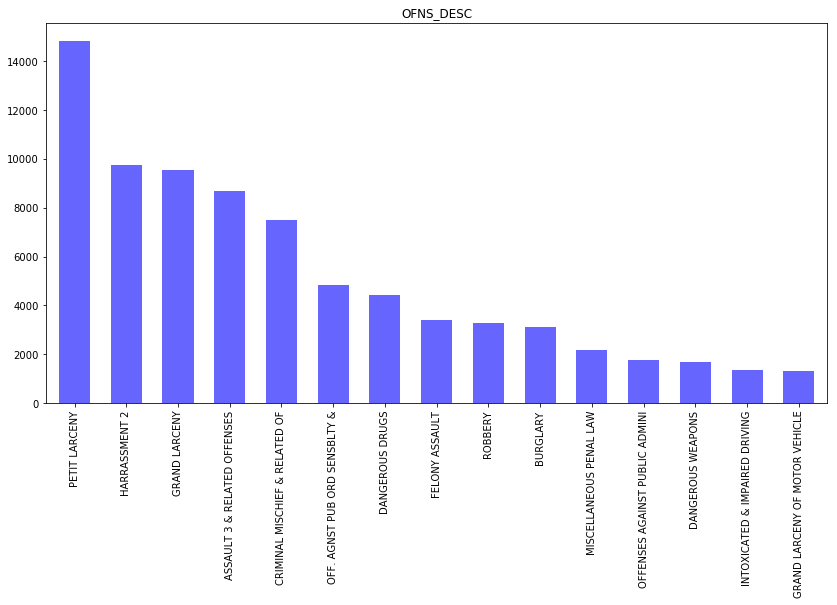

In [133]:
ds['OFNS_DESC'][ds['year'] == 2013]\
    .value_counts()[0:15]\
    .plot(kind='bar', figsize=[14, 7],width=0.6,alpha=0.6,color='b',grid=False,title='OFNS_DESC')
plt.show()

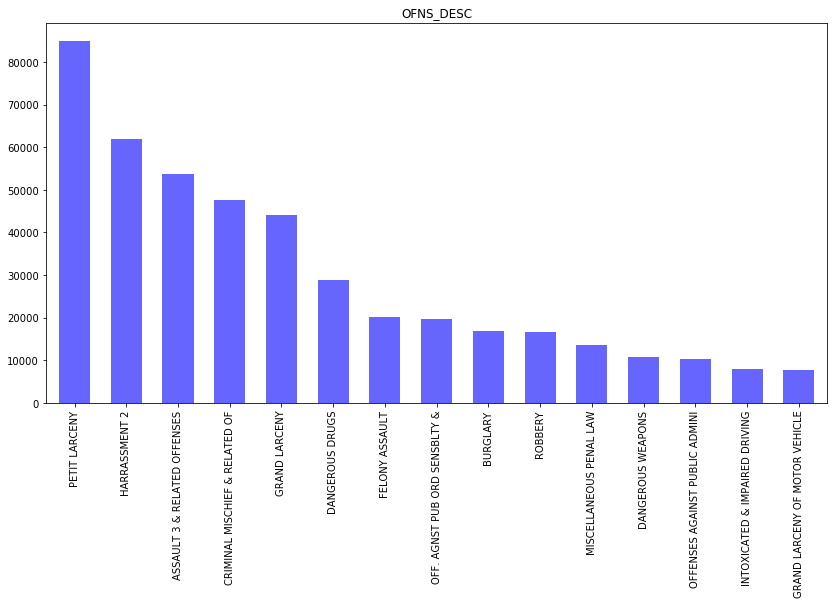

In [131]:
ds['OFNS_DESC'][ds['year'] == 2014]\
    .value_counts()[0:15]\
    .plot(kind='bar', figsize=[14, 7],width=0.6,alpha=0.6,color='b',grid=False,title='OFNS_DESC')
plt.show()

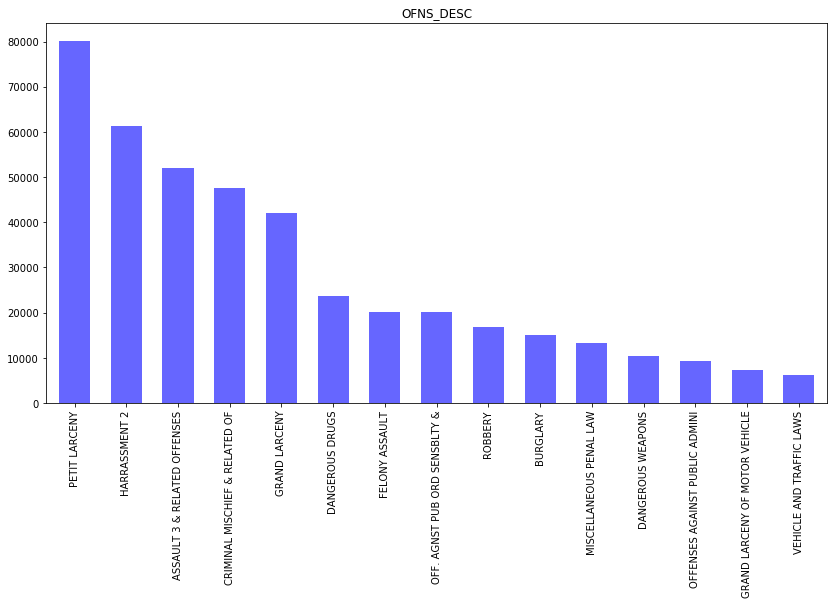

In [134]:
ds['OFNS_DESC'][ds['year'] == 2015]\
    .value_counts()[0:15]\
    .plot(kind='bar', figsize=[14, 7],width=0.6,alpha=0.6,color='b',grid=False,title='OFNS_DESC')
plt.show()

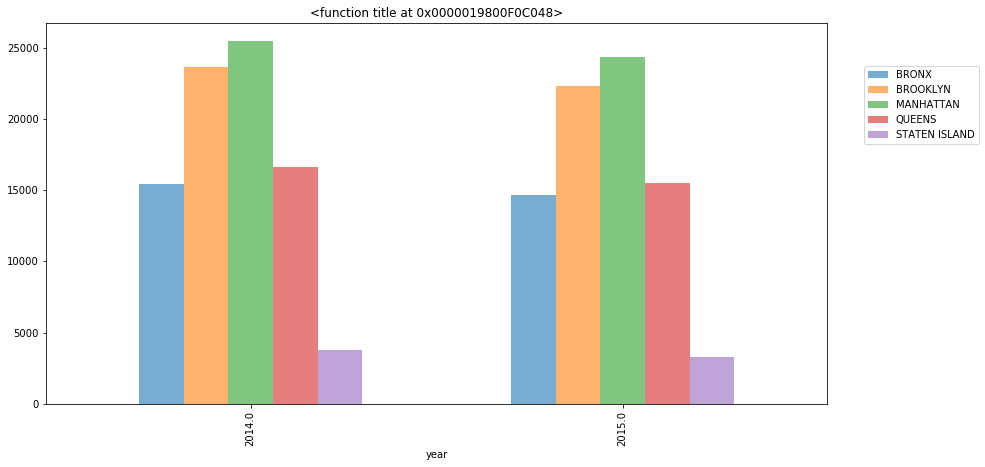

In [165]:
ax = ds[ds['OFNS_DESC'] == 'PETIT LARCENY'][ds['year'] >= 2014]\
    .groupby(["year", "BORO_NM"]).size()\
    .unstack()\
    .plot(kind='bar', figsize=[14, 7],width=0.6,alpha=0.6,grid=False,title=title).legend(bbox_to_anchor=(1.2, 0.9))